<a href="https://colab.research.google.com/github/harnalashok/CatEncodersFamily/blob/main/makeclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catencfamily==0.1.18

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 799.2 kB/s eta 0:00:00
  Attempting uninstall: catencfamily
    Found existing installation: catencfamily 0.1.17
    Uninstalling catencfamily-0.1.17:
      Successfully uninstalled catencfamily-0.1.17


In [30]:
#code starts

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from catencfamily.encoders import CatEncodersFamily
from catencfamily import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [47]:
X, y = make_classification(n_samples=20000,
                           n_features=10,
                           n_informative=5,
                           n_classes=2,
                           n_clusters_per_class=2,
                           scale = 30
                           )

data = pd.DataFrame(X, columns = list('abcdefghij'))
data['target'] = y
data.head()

,a,b,c,d,e,f,g,h,i,j,target
0,-27.952657,11.982668,36.153655,36.158853,-14.930992,-19.363849,-5.979333,44.337071,-1.758823,-12.892415,1
1,-15.196306,55.131192,-5.675194,106.090423,-5.078500,-68.293422,112.345672,65.952671,80.840632,-93.772825,1
2,17.314250,110.495553,44.925499,120.041226,0.973044,-19.975210,51.430492,25.005339,42.652902,-107.253453,1
3,-83.681968,19.169329,-19.860598,14.427269,38.572725,-12.150456,55.371382,72.987503,-85.099518,36.774566,1
4,-0.008839,38.477089,-8.569997,11.522479,-4.834759,49.883263,37.757646,-21.246196,26.636970,-86.853079,0


In [34]:
y = data.pop('target')
# 4.0 Define categorical columns
cat_cols = list(data.columns)

# Instantiate CatEncodersFamily class
ct = CatEncodersFamily(
    cMeasures=[1, 1, 1, 1, None, 1, 1],
    saveGraph=False
)

In [36]:
# Define the pipeline including preprocessing and classification
#n_components = min(train_binned.shape[0], train_binned.shape[1])
pipeline = Pipeline([('kb', KBinsDiscretizer(n_bins = 30,
                                             encode = 'ordinal',
                                             strategy='kmeans',
                                             dtype = np.float32)),
    ('ct', ct),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('pca', PCA(n_components=2, whiten=True, random_state=None)),

])

In [38]:
# There are double underscore here:
pipeline.fit(data,
             y,
             ct__cat_cols = cat_cols,
             ct__interactingCatCols = cat_cols,
             ct__dataCols= list(data.columns)
             )




====Takes time...



Pipeline(steps=[('kb',
                 KBinsDiscretizer(dtype=<class 'numpy.float32'>,
                                  encode='ordinal', n_bins=30,
                                  strategy='kmeans')),
                ('ct',
                 CatEncodersFamily(avoidInteractionFeatures=[],
                                   cMeasures=[1, 1, 1, 1, None, 1, 1],
                                   mergelevelsincols=[],
                                   pathToStoreProgress=PosixPath('/content/allmodels/progress'))),
                ('imputer', SimpleImputer(strategy='median')),
                ('pca', PCA(n_components=2, whiten=True))])

In [39]:
X_train = pipeline.transform(data)




====Takes time...



In [40]:
X_train.shape

(20000, 2)

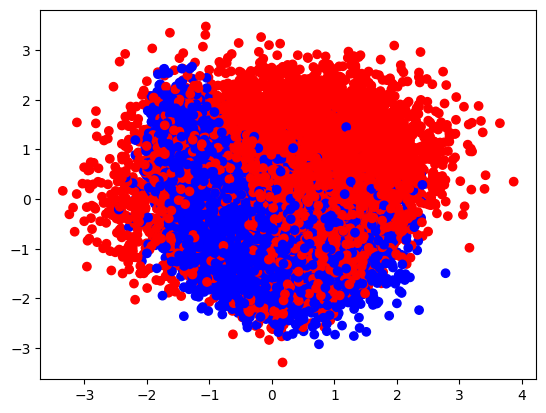

In [41]:
_= plt.scatter(X_train[:,0],X_train[:,1],
            color = ['red' if v == 1 else 'green' if v == 2 else 'blue' for v in y])

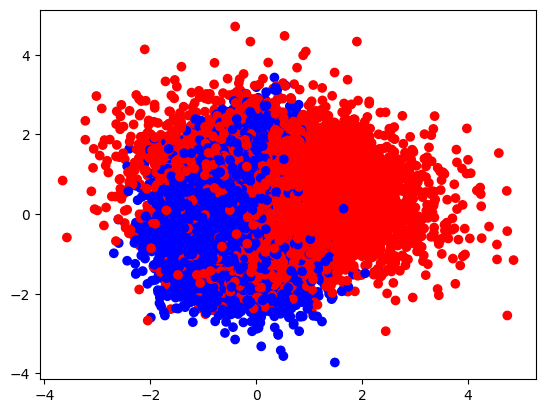

In [46]:
# Define the pipeline including preprocessing and classification
#n_components = min(train_binned.shape[0], train_binned.shape[1])
pipeline_a = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('pca', PCA(n_components=2, whiten=True, random_state=None)),

])
# There are double underscore here:
pipeline_a.fit(data,
             y,
             )
x_train = pipeline_a.transform(data)
_= plt.scatter(x_train[:,0],x_train[:,1],
            color = ['red' if v == 1 else 'green' if v == 2 else 'blue' for v in y])

In [ ]:
###################